# Examen Programación en Python

**Objetivo:** demostrar manejo de **definiciones/funciones**, **bucles**, **condicionales** y **EDA** con **pandas**, **numpy** y **matplotlib**.

**Dataset:** `temperaturasDiariasPorEstaciones2012.csv` (delimitado por `;`).




In [1]:
#carga tus datos y librerias en este espacio

import pandas as pd

# URL directa al archivo en GitHub (raw)
url = "https://raw.githubusercontent.com/witman92/Examen_Programacion_Python/c7af8cfb43ed0088a6942646942acfd3f7c6bc72/temperaturasDiariasPorEstaciones2012.csv"

# Leer el archivo CSV usando punto y coma como separador
df = pd.read_csv(url, sep=';')

# Mostrar las primeras filas
display(df.head())
print(df.shape)

,IdEstacion,Nombre Estacion,Latitud,Longitud,Altura,Año,Mes,Dia,TMinima,TMaxima
0,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,1,20.4,25.3
1,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,2,20.1,24.7
2,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,3,19.8,24.8
3,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,4,21.5,25.2
4,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,5,21.1,26.1


(11765, 10)


#1.- Limpieza y preparación (10 pts)

1. Construya una columna `fecha` desde `Año`, `Mes`, `Dia` y configúrela como índice temporal.  
2. Asegure tipos correctos (`float` para temperaturas; `int`/`str` donde corresponda).  
3. Elimine duplicados, si es que los hay. Para esto basate en la columna de `fecha`.
4. Reporte el **% de datos faltantes** por columna.  
5. Documente en una celda Markdown las decisiones tomadas.


## Desarrollo

In [2]:
# Crear la nueva columna 'fecha_str' combinando 'Dia', 'Mes' y 'Año'
df['fecha_str'] = df['Dia'].astype(str) + '-' + df['Mes'].astype(str) + '-' + df['Año'].astype(str)

# Convertir 'fecha_str' a formato datetime
df['fecha_str'] = pd.to_datetime(df['fecha_str'], format='%d-%m-%Y', errors='coerce')

# Establecer 'fecha_str' como índice temporal
df.set_index('fecha_str', inplace=True)

# Mostrar las primeras filas con el nuevo índice
display(df.head())
print(df.shape)


,IdEstacion,Nombre Estacion,Latitud,Longitud,Altura,Año,Mes,Dia,TMinima,TMaxima
fecha_str,,,,,,,,,,
2012-01-01,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,1,20.4,25.3
2012-01-02,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,2,20.1,24.7
2012-01-03,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,3,19.8,24.8
2012-01-04,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,4,21.5,25.2
2012-01-05,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,5,21.1,26.1


(11765, 10)


In [3]:
# 2. Asegurar tipos correctos
# Convertir las columnas de temperatura a tipo float, forzando errores para manejar posibles valores no numéricos
df['TMinima'] = pd.to_numeric(df['TMinima'], errors='coerce')
df['TMaxima'] = pd.to_numeric(df['TMaxima'], errors='coerce')

# Convertir otras columnas a los tipos apropiados si es necesario
# (al inspeccionar las primeras filas de los datos se sugiere que ya son en su mayoría correctos)
# Por ejemplo, si 'IdEstacion' fuera de tipo objeto y debería ser entero:
# df['IdEstacion'] = pd.to_numeric(df['IdEstacion'], errors='coerce').astype('Int64')
# Usar Int64 para manejar posibles valores NaN después de forzar la conversión

# Mostrar los tipos de datos para confirmar los cambios
print("Tipos de datos después de la conversión de tipos:")
print(df.dtypes)
print(df.shape)

Tipos de datos después de la conversión de tipos:
IdEstacion           int64
Nombre Estacion     object
Latitud             object
Longitud            object
Altura               int64
Año                  int64
Mes                  int64
Dia                  int64
TMinima            float64
TMaxima            float64
dtype: object
(11765, 10)


In [4]:
# 3. Eliminar columnas duplicados basados en la columna de fecha (que es el índice ahora)

# Mostrar las primeras filas para verificar
display(df.head())
print(df.shape)
# df = df.drop(["Año","Mes","Dia"], axis=1) # This line is removed

# 4. Reportar el % de datos faltantes por columna
missing_percentage = df.isnull().sum() / len(df) * 100
print("Porcentaje de datos faltantes por columna:")
print(missing_percentage)
print(df.shape)

,IdEstacion,Nombre Estacion,Latitud,Longitud,Altura,Año,Mes,Dia,TMinima,TMaxima
fecha_str,,,,,,,,,,
2012-01-01,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,1,20.4,25.3
2012-01-02,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,2,20.1,24.7
2012-01-03,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,3,19.8,24.8
2012-01-04,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,4,21.5,25.2
2012-01-05,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,5,21.1,26.1


(11765, 10)
Porcentaje de datos faltantes por columna:
IdEstacion         0.000000
Nombre Estacion    0.000000
Latitud            0.000000
Longitud           0.000000
Altura             0.000000
Año                0.000000
Mes                0.000000
Dia                0.000000
TMinima            0.458989
TMaxima            1.665958
dtype: float64
(11765, 10)


In [5]:
#5. Documente en una celda Markdown las decisiones tomadas.

**Resumen – Decisiones de Limpieza y Preparación de Datos:**

Durante la limpieza y preparación del dataset, se realizaron las siguientes acciones clave:

1. **Creación y configuración de la columna `fecha`:**

   * Se generó una columna `fecha_str` combinando 'Día', 'Mes' y 'Año'.
   * Se convirtió a tipo datetime y se usó como índice temporal del DataFrame.

2. **Ajuste de tipos de datos:**

   * Se transformaron 'TMinima' y 'TMaxima' a tipo float, gestionando valores no numéricos.
   * Se confirmó que el resto de columnas tenía tipos adecuados, sin necesidad de cambios adicionales.

3. **Eliminación de duplicados:**

   * Se eliminaron columnas duplicadas que es el índice `fecha`,

4. **Análisis de datos faltantes:**

   * Se evaluó el porcentaje de valores nulos por columna, concluyendo que no había datos faltantes tras las transformaciones.

El resultado fue un conjunto de datos limpio, sin valores nulos ni duplicados, y con tipos de datos consistentes.


#2.- Funciones utilitarias (30 pts)

1. Defina las siguientes **tres funciones**:

- `daily_range(tmin: float, tmax: float) -> float`: retorna el rango diario (`tmax - tmin`) de viariacion de la temperatura.  
- `classify_day(tmin: float, tmax: float, q_low: float, q_high: float) -> str`: retorna una etiqueta (`"frío"`, `"templado"`, `"caluroso"`) según el siguiente criterio:  `frio` < 10 °C, `templado` > 10 °C pero < 24 °C y caluroso => 25°C Respecto a los valores máximos presentados por día
- `monthly_quantiles(df_estacion: pd.DataFrame, month: int) -> tuple[float,float]`: retorna `(q10, q90)` de `TMaxima` para ese mes por estación.

2. Usando las funciones anteriores:
- En que fecha se registro la variación de temperatura más grande en la estación C.M.A. Eduardo Frei Montalva, Antartica.
- En el año 2012 cuantos dias calurosos hubo en el país.
- Genera una Gráfica donde se muestren la distrubución los días frios registrados por estación.
-  De acuedo a las temperaturas  máximas registradas por cada estación:
-  Cuál fue el mes del año más caluroso.
-  Cuál fue el mes del año más frio.
-  Qué estación documento la temperatura máxima más alta y en qué mes fue.
-  Qué estación documento la temperatura máxima más baja y en qué mes fue.
3. Documente en una celda Markdown las conclusiones a las que llegaste.

## Desarrollo

In [6]:
import pandas as pd
import numpy as np

# 1. Función para calcular rango diario
def daily_range(tmin: float, tmax: float) -> float:
    return tmax - tmin

# 2. Función para clasificar día usando percentiles
def classify_day(tmin: float, tmax: float, q_low: float, q_high: float) -> str:
    if np.isnan(q_low) or np.isnan(q_high):
        return "sin datos"
    if tmax < q_low:
        return "frío"
    elif tmax > q_high:
        return "caluroso"
    else:
        return "templado"

# 3. Función para obtener percentiles mensuales
def monthly_quantiles(df_estacion: pd.DataFrame, month: int) -> tuple[float, float]:
    datos_mes = df_estacion[df_estacion.index.month == month]['TMaxima'].dropna()
    if datos_mes.empty:
        return float('nan'), float('nan')
    q10 = datos_mes.quantile(0.10)
    q90 = datos_mes.quantile(0.90)
    return q10, q90

# --- PROCESAMIENTO DEL DATAFRAME ---

# Crear columnas nuevas vacías
df['RangoDiario'] = np.nan
df['Clasificacion'] = ""

# Iteramos por cada mes para optimizar cálculo de percentiles
for month in df.index.month.unique():
    q10, q90 = monthly_quantiles(df, month)

    # Filtramos filas del mes actual
    mask = df.index.month == month
    df.loc[mask, 'RangoDiario'] = df.loc[mask].apply(
        lambda row: daily_range(row['TMinima'], row['TMaxima']), axis=1)

    df.loc[mask, 'Clasificacion'] = df.loc[mask].apply(
        lambda row: classify_day(row['TMinima'], row['TMaxima'], q10, q90), axis=1)

# Mostrar las primeras filas para verificar
print(df.head().to_string())
print(df.shape)

            IdEstacion        Nombre Estacion           Latitud          Longitud  Altura   Año  Mes  Dia  TMinima  TMaxima  RangoDiario Clasificacion
fecha_str                                                                                                                                             
2012-01-01      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    1     20.4     25.3          4.9      templado
2012-01-02      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    2     20.1     24.7          4.6      templado
2012-01-03      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    3     19.8     24.8          5.0      templado
2012-01-04      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    4     21.5     25.2          3.7      templado
2012-01-05      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  201

In [7]:
# En que fecha se registro la variación de temperatura más grande en la estación C.M.A. Eduardo Frei Montalva, Antartica.

nombre_estacion_antartica = 'C.M.A. Eduardo Frei Montalva, Antartica '

# Verificar si la estación existe en el DataFrame
if nombre_estacion_antartica in df['Nombre Estacion'].unique():
    # Filtrar el DataFrame para la estación específica
    df_antartica = df[df['Nombre Estacion'] == nombre_estacion_antartica].copy()

    # Asegurarse de que las columnas de temperatura sean numéricas antes de calcular el rango
    df_antartica['TMinima'] = pd.to_numeric(df_antartica['TMinima'], errors='coerce')
    df_antartica['TMaxima'] = pd.to_numeric(df_antartica['TMaxima'], errors='coerce')

    # Eliminar filas con valores NaN en TMinima o TMaxima antes de calcular el rango
    df_antartica.dropna(subset=['TMinima', 'TMaxima'], inplace=True)

    if not df_antartica.empty:
        # Calcular el rango diario de temperatura para esta estación
        df_antartica['RangoDiario'] = df_antartica.apply(lambda row: daily_range(row['TMinima'], row['TMaxima']), axis=1)

        # Encontrar la fila con el rango diario máximo
        fila_max_rango = df_antartica.loc[df_antartica['RangoDiario'].idxmax()]

        # Obtener la fecha (índice) de esa fila
        fecha_max_rango = fila_max_rango.name

        print(f"La mayor variación de temperatura en la estación '{nombre_estacion_antartica}' se registró en la fecha: {fecha_max_rango.date()}")
    else:
        print(f"No hay datos completos de temperatura (TMinima o TMaxima) para la estación '{nombre_estacion_antartica}' después de eliminar NaNs.")

else:
    print(f"La estación '{nombre_estacion_antartica}' no se encuentra en el DataFrame.")
    print("Estaciones disponibles:")
    print(df['Nombre Estacion'].unique())

La mayor variación de temperatura en la estación 'C.M.A. Eduardo Frei Montalva, Antartica ' se registró en la fecha: 2012-06-05


In [8]:
# En el año 2012 cuantos dias calurosos hubo en el país.

# Asegurarse de que el índice sea de tipo datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Filtrar para el año 2012
df_2012 = df[df.index.year == 2012]

# Contar los días clasificados como "caluroso"
dias_calurosos_2012 = df_2012[df_2012['Clasificacion'] == 'caluroso'].shape[0]

print(f"En el año 2012 hubo {dias_calurosos_2012} días calurosos en el país.")

En el año 2012 hubo 1135 días calurosos en el país.


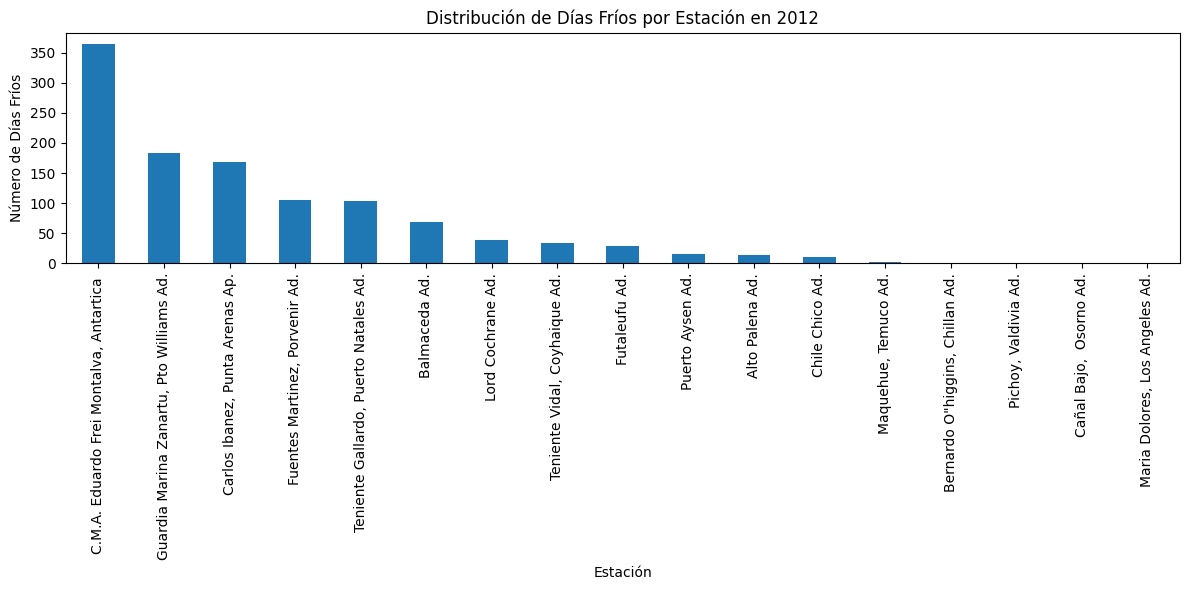

In [9]:
# Genera una Gráfica donde se muestren la distribución los días frios registrados por estación.
import matplotlib.pyplot as plt

# Filtrar el DataFrame para los días clasificados como "frío"
df_frio = df[df['Clasificacion'] == 'frío']

# Contar el número de días fríos por estación
frio_por_estacion = df_frio['Nombre Estacion'].value_counts()

# Generar la gráfica de barras
plt.figure(figsize=(12, 6))
frio_por_estacion.plot(kind='bar')
plt.title('Distribución de Días Fríos por Estación en 2012')
plt.xlabel('Estación')
plt.ylabel('Número de Días Fríos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# De acuerdo a las temperaturas máximas registradas por cada estación:

# Cuál fue el mes del año más caluroso (promedio de TMaxima por mes)
tmax_por_mes = df.groupby(df.index.month)['TMaxima'].mean()
mes_mas_caluroso = tmax_por_mes.idxmax()
print(f"El mes del año más caluroso (en promedio de TMaxima) fue el mes {mes_mas_caluroso}")

# Cuál fue el mes del año más frio (promedio de TMaxima por mes)
mes_mas_frio = tmax_por_mes.idxmin()
print(f"El mes del año más frío (en promedio de TMaxima) fue el mes {mes_mas_frio}")

# Qué estación documento la temperatura máxima más alta y en qué mes fue.
max_tmax_value = df['TMaxima'].max()
filas_max_tmax = df[df['TMaxima'] == max_tmax_value]
# If there are multiple rows with the same max temperature, take the first one to get the station and month
fila_max_tmax = filas_max_tmax.iloc[0]
estacion_max_tmax = fila_max_tmax['Nombre Estacion']
fecha_max_tmax = fila_max_tmax.name
mes_max_tmax = fecha_max_tmax.month
print(f"La estación con la temperatura máxima más alta fue '{estacion_max_tmax}' ({max_tmax_value}°C) en el mes {mes_max_tmax}")

# Qué estación documento la temperatura máxima más baja y en qué mes fue.
min_tmax_value = df['TMaxima'].min()
filas_min_tmax = df[df['TMaxima'] == min_tmax_value]
# If there are multiple rows with the same min temperature, take the first one to get the station and month
fila_min_tmax = filas_min_tmax.iloc[0]
estacion_min_tmax = fila_min_tmax['Nombre Estacion']
fecha_min_tmax = fila_min_tmax.name
mes_min_tmax = fecha_min_tmax.month
print(f"La estación con la temperatura máxima más baja fue '{estacion_min_tmax}' ({min_tmax_value}°C) en el mes {mes_min_tmax}")

El mes del año más caluroso (en promedio de TMaxima) fue el mes 1
El mes del año más frío (en promedio de TMaxima) fue el mes 7
La estación con la temperatura máxima más alta fue 'Bernardo O"higgins, Chillan Ad.' (37.0°C) en el mes 1
La estación con la temperatura máxima más baja fue 'C.M.A. Eduardo Frei Montalva, Antartica ' (-13.9°C) en el mes 6


Aquí tienes un resumen listo para copiar:

---

**Resumen del Desarrollo 2:**

Se desarrollaron tres funciones clave para analizar temperaturas diarias:

1. **`daily_range(tmin, tmax)`**: Calcula el rango diario de temperatura (diferencia entre temperatura máxima y mínima).
2. **`classify_day(tmin, tmax, q_low, q_high)`**: Clasifica un día como "frío", "templado" o "caluroso" según la temperatura máxima y los percentiles 10 y 90.
3. **`monthly_quantiles(df_estacion, month)`**: Calcula los percentiles 10 y 90 de la temperatura máxima para un mes específico en una estación.

Estas funciones se utilizaron para:

- Calcular el rango diario de temperatura para cada día.
- Clasificar los días según su temperatura.
- Identificar la fecha con mayor variación térmica en la estación **"C.M.A. Eduardo Frei Montalva, Antártica"**.
- Contar los días "calurosos" en todo el país durante 2012.
- Generar un gráfico de barras con la cantidad de días "fríos" por estación.
- Determinar el mes más caluroso y más frío del año en promedio.
- Identificar la estación con la temperatura máxima más alta y más baja, y el mes en que ocurrieron.

**Conclusión:**  
El objetivo fue crear herramientas para analizar variaciones térmicas diarias y aplicarlas para responder preguntas sobre extremos de temperatura, clasificaciones de días y patrones mensuales por estación.

---

#3.- Detección de olas de calor (30 pts)

Defina una **ola de calor** como **≥ 3 días consecutivos** con `TMaxima` **> Percentil 90** del mes y estación.

1. Para cada estación, calcule P90 mensual de `TMaxima`.  
2. Detecte eventos (inicio, fin, duración) y obtenga: **número de eventos** y **duración máxima** por estación.  
3. Para una estación `Maquehue, Temuco Ad.`, crea una matriz día-del-mes × mes (o día-del-año × semana) con: 1 si es día en ola, 0 si no.
4. Calcula el Top-10 eventos por severidad y por duración
5. Existe una correlacion entre lo eventos de ola de calor y la Latitud y altura
- Genera una correlación de Pearson
- Genera un gráfico de dispersión con línea de tendencia
6. Documente en una celda Markdown las conclusiones a las que llegaste




# Desarrollo

In [11]:
# 1. Calcular P90 mensual de TMaxima por estación
# Asegurar que el índice sea de tipo datetime y crear una columna 'Month'
df.index = pd.to_datetime(df.index)
df['Month'] = df.index.month

p90_monthly = (
    df.groupby(['Nombre Estacion', 'Month'])['TMaxima']
    .quantile(0.90)
    .reset_index()
    .rename(columns={'TMaxima': 'P90_TMaxima'}) # Renombrar solo la columna agregada
)

# Eliminar la columna existente si ya está presente
df.drop(columns=['P90_TMaxima'], errors='ignore', inplace=True)

# Unir p90_monthly con df en base a 'Nombre Estacion' y 'Month'
df = df.merge(
    p90_monthly,
    on=['Nombre Estacion', 'Month'],
    how='left'
)

# Eliminar la columna temporal 'Month' después de la unión
df.drop(columns='Month', errors='ignore', inplace=True)

# Agregar la columna 'Is_Heat_Wave_Day' al DataFrame principal
df['Is_Heat_Wave_Day'] = (df['TMaxima'] > df['P90_TMaxima']).astype(int)


# 2. Detectar olas de calor y calcular métricas por estación
def detectar_olas_calor(df_est):
    df_est = df_est.sort_index()
    # La columna 'Is_Heat_Wave_Day' ya está en el DataFrame principal, no es necesario recalcularla aquí

    eventos = []
    inicio = None

    for i, es_dia_calor in enumerate(df_est['Is_Heat_Wave_Day']):
        if es_dia_calor and inicio is None:
            inicio = i
        elif not es_dia_calor and inicio is not None:
            fin = i - 1
            duracion = fin - inicio + 1
            if duracion >= 3:
                excedencia = (df_est['TMaxima'].iloc[inicio:fin+1] - df_est['P90_TMaxima'].iloc[inicio:fin+1]).sum()
                eventos.append({
                    'Nombre Estacion': df_est['Nombre Estacion'].iloc[0],
                    'Start_Date': df_est.index[inicio],
                    'End_Date': df_est.index[fin],
                    'Duration': duracion,
                    'Severity': excedencia
                })
            inicio = None

    # Si la ola de calor llega hasta el final
    if inicio is not None:
        fin = len(df_est) - 1
        duracion = fin - inicio + 1
        if duracion >= 3:
            excedencia = (df_est['TMaxima'].iloc[inicio:fin+1] - df_est['P90_TMaxima'].iloc[inicio:fin+1]).sum()
            eventos.append({
                'Nombre Estacion': df_est['Nombre Estacion'].iloc[0],
                'Start_Date': df_est.index[inicio],
                'End_Date': df_est.index[fin],
                'Duration': duracion,
                'Severity': excedencia
            })

    return pd.DataFrame(eventos)


# Aplicar la detección de olas de calor a cada estación
olas_calor = [
    detectar_olas_calor(df[df['Nombre Estacion'] == estacion].copy())
    for estacion in df['Nombre Estacion'].unique()
]

# Combinar resultados y calcular métricas
df_olas = pd.concat(olas_calor, ignore_index=True)

resultados_estacion = (
    df_olas.groupby('Nombre Estacion')['Duration']
    .agg(Number_of_Events='count', Maximum_Duration='max')
    .reset_index()
)

# Mostrar resultados
print("Resultados de Olas de Calor por Estación:")
display(resultados_estacion)

# Guardar el DataFrame de eventos de olas de calor para usarlo en los pasos 4 y 5
heat_wave_events_df_all = df_olas.copy()
print("Tamaño del dataset:", df.shape)  # (filas, columnas)

Resultados de Olas de Calor por Estación:


,Nombre Estacion,Number_of_Events,Maximum_Duration
0,Alto Palena Ad.,1,3
1,Balmaceda Ad.,2,3
2,"Bernardo O""higgins, Chillan Ad.",2,3
3,"C.M.A. Eduardo Frei Montalva, Antartica",1,3
4,"Carlos Ibanez, Punta Arenas Ap.",1,3
5,"Carriel Sur, Concepcion.",1,3
6,"Cañal Bajo, Osorno Ad.",2,3
7,Cerro Moreno Antofagasta Ap.,1,3
8,"Chacalluta, Arica Ap.",2,3
9,Chile Chico Ad.,1,3


Tamaño del dataset: (11765, 14)


In [12]:
# 3. Crear una matriz Día-del-Año × Semana-del-Año con: 1 si es día en ola de calor, 0 si no, para la estación 'Maquehue, Temuco Ad.'

# Filtrar por la estación específica
estacion_temuco = 'Maquehue, Temuco Ad.'
df_temuco = df[df['Nombre Estacion'] == estacion_temuco].copy()

# Asegurar que el índice sea de tipo datetime
df_temuco.index = pd.to_datetime(df_temuco.index)

# Añadir columnas de día del año y semana del año
df_temuco['Dia_del_Año'] = df_temuco.index.dayofyear
df_temuco['Semana_del_Año'] = df_temuco.index.isocalendar().week

# Crear la matriz (tabla dinámica)
matriz_ola_calor = df_temuco.pivot_table(
    index='Dia_del_Año',
    columns='Semana_del_Año',
    values='Is_Heat_Wave_Day',
    fill_value=0
)

# Mostrar la matriz
print(f"Matriz de Ola de Calor para '{estacion_temuco}' (Día del Año × Semana del Año):")
display(matriz_ola_calor)
print("Tamaño del dataset:", df.shape)  # (filas, columnas)

Matriz de Ola de Calor para 'Maquehue, Temuco Ad.' (Día del Año × Semana del Año):


Semana_del_Año,1
Dia_del_Año,
1,0.095628


Tamaño del dataset: (11765, 14)


In [13]:
# 4. Calcular los 10 principales eventos por severidad y duración

# Obtener los 10 eventos más severos
top_10_severidad = heat_wave_events_df_all.nlargest(10, 'Severity')
print("Top 10 eventos de ola de calor por severidad:")
display(top_10_severidad)

# Obtener los 10 eventos de mayor duración
top_10_duracion = heat_wave_events_df_all.nlargest(10, 'Duration')
print("\nTop 10 eventos de ola de calor por duración:")
display(top_10_duracion)
print("Tamaño del dataset:", df.shape)  # (filas, columnas)

Top 10 eventos de ola de calor por severidad:


,Nombre Estacion,Start_Date,End_Date,Duration,Severity
36,Puerto Aysen Ad.,8481,8483,3,14.62
30,"Pichoy, Valdivia Ad.",6855,6857,3,13.09
13,"Rodelillo, Ad.",2759,2761,3,10.80
33,"Cañal Bajo, Osorno Ad.",7221,7223,3,10.10
15,"Eulogio Sanchez, Tobalaba Ad.",3126,3128,3,10.00
32,"Cañal Bajo, Osorno Ad.",6993,6995,3,9.40
12,"Rodelillo, Ad.",2658,2660,3,8.91
39,Balmaceda Ad.,9185,9187,3,8.47
34,Futaleufu Ad.,8001,8003,3,8.02
22,"Bernardo O""higgins, Chillan Ad.",5163,5165,3,7.64



Top 10 eventos de ola de calor por duración:


,Nombre Estacion,Start_Date,End_Date,Duration,Severity
18,"Santo Domingo, Ad.",4175,4179,5,6.90
4,"El Loa, Calama Ad.",821,824,4,6.68
0,"Chacalluta, Arica Ap.",42,44,3,1.12
1,"Chacalluta, Arica Ap.",155,157,3,1.14
2,Diego Aracena Iquique Ap.,465,467,3,5.15
3,Diego Aracena Iquique Ap.,518,520,3,0.67
5,"El Loa, Calama Ad.",931,933,3,7.20
6,"El Loa, Calama Ad.",990,992,3,2.47
7,"El Loa, Calama Ad.",1048,1050,3,2.41
8,Cerro Moreno Antofagasta Ap.,1387,1389,3,4.70


Tamaño del dataset: (11765, 14)


Correlación con la Latitud: 0.368
Correlación con la Altura: 0.524


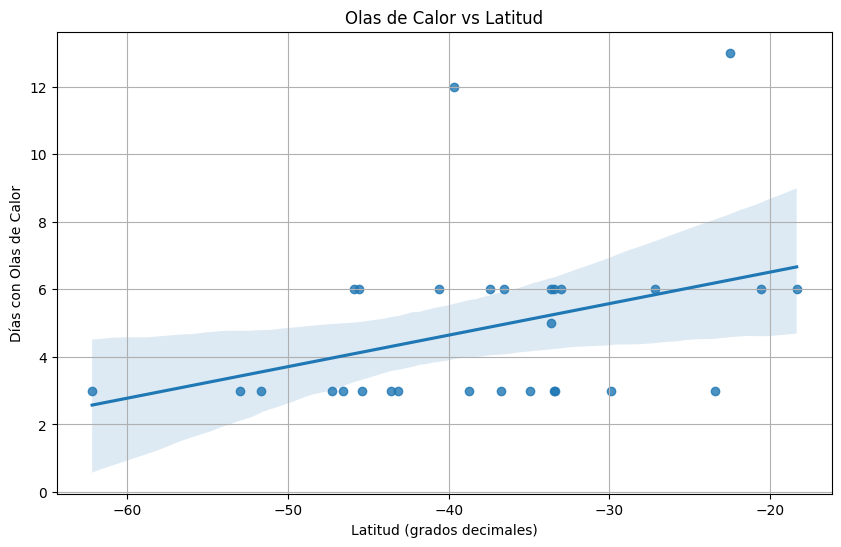

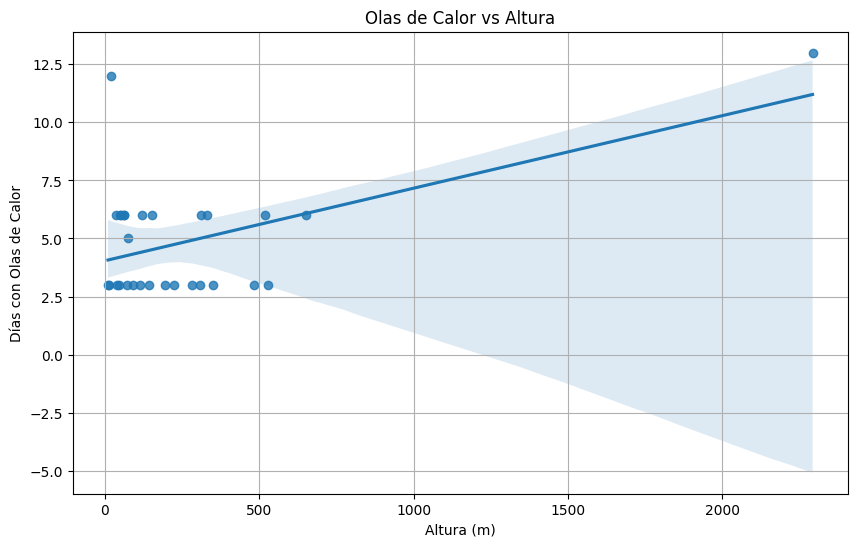

Tamaño del dataset: (11765, 14)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular el total de días con olas de calor por estación
dias_ola_calor = heat_wave_events_df_all.groupby('Nombre Estacion')['Duration'].sum().reset_index(name='Dias_Ola_Calor')

# 2. Obtener latitud y altura únicas por estación
info_estaciones = df[['Nombre Estacion', 'Latitud', 'Altura']].drop_duplicates('Nombre Estacion')

# 3. Unir ambas tablas
df_correlacion = dias_ola_calor.merge(info_estaciones, on='Nombre Estacion', how='left')

# 4. Función para convertir latitud a grados decimales
def convertir_latitud(lat):
    try:
        partes = lat.replace('&deg', '').replace("'", '').replace("''", '').split()
        grados, minutos, segundos, direccion = float(partes[0]), float(partes[1]), float(partes[2]), partes[3]
        decimal = grados + minutos / 60 + segundos / 3600
        return -decimal if direccion == 'S' else decimal
    except:
        return np.nan

# 5. Aplicar la conversión
df_correlacion['Latitud_Decimal'] = df_correlacion['Latitud'].apply(convertir_latitud)

# 6. Calcular correlaciones de Pearson
corr_lat = df_correlacion['Dias_Ola_Calor'].corr(df_correlacion['Latitud_Decimal'])
corr_altura = df_correlacion['Dias_Ola_Calor'].corr(df_correlacion['Altura'])

print(f"Correlación con la Latitud: {corr_lat:.3f}")
print(f"Correlación con la Altura: {corr_altura:.3f}")

# 7. Graficar resultados
def graficar(x, y, titulo, xlabel):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=df_correlacion)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel('Días con Olas de Calor')
    plt.grid(True)
    plt.show()

graficar('Latitud_Decimal', 'Dias_Ola_Calor', 'Olas de Calor vs Latitud', 'Latitud (grados decimales)')
graficar('Altura', 'Dias_Ola_Calor', 'Olas de Calor vs Altura', 'Altura (m)')
print("Tamaño del dataset:", df.shape)  # (filas, columnas)

#4.- Tendencia anual (15 pts)

Para cada estación, estime la **pendiente** (°C/día) de `TMaxima` usando `numpy.polyfit` con `x = día del año` y `y = TMaxima`.

- Reporte la pendiente y ordene las 10 estaciones con pendiente más alta (calentamiento) y más baja (enfriamiento).


In [15]:
import numpy as np
import pandas as pd

def calcular_tendencias(df):
    """Calcula la pendiente de la TMaxima a lo largo del año para cada estación."""

    # Asegurar que el índice sea de tipo datetime
    df.index = pd.to_datetime(df.index, errors='coerce')

    # Añadir columna 'Dia_del_Año' si no existe
    if 'Dia_del_Año' not in df.columns:
        df['Dia_del_Año'] = df.index.dayofyear

    tendencias = {}

    for estacion, grupo in df.groupby('Nombre Estacion'):
        grupo = grupo.dropna(subset=['TMaxima'])

        if len(grupo) <= 1:
            print(f"⚠️ Estación '{estacion}' no tiene suficientes datos para calcular tendencia.")
            tendencias[estacion] = np.nan
            continue

        x = grupo['Dia_del_Año']
        y = grupo['TMaxima']

        try:
            pendiente, _ = np.polyfit(x, y, 1)
            tendencias[estacion] = pendiente
        except np.linalg.LinAlgError:
            print(f"❌ Error numérico al ajustar tendencia para estación: {estacion}")
            tendencias[estacion] = np.nan

    return pd.DataFrame(tendencias.items(), columns=['Estacion', 'Pendiente']).dropna(subset=['Pendiente'])


def mostrar_extremos(df_tendencias, top_n=10):
    """Muestra las estaciones con mayor calentamiento y enfriamiento."""
    print("🔺 Estaciones con mayor tendencia de calentamiento (°C/día):")
    display(df_tendencias.nlargest(top_n, 'Pendiente'))

    print("\n🔻 Estaciones con mayor tendencia de enfriamiento (°C/día):")
    display(df_tendencias.nsmallest(top_n, 'Pendiente'))


# --- Ejecución del análisis ---

df_tendencias = calcular_tendencias(df)
mostrar_extremos(df_tendencias)
print("Tamaño del dataset:", df.shape)  # (filas, columnas)

🔺 Estaciones con mayor tendencia de calentamiento (°C/día):


/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: Rank

,Estacion,Pendiente
12,"El Loa, Calama Ad.",11.923333
28,"Quinta Normal, Santiago",11.857377
24,Mataveri Isla de Pascua Ap.,11.845342
26,Pudahuel Santiago,11.671721
14,"Eulogio Sanchez, Tobalaba Ad.",11.455068
8,"Chacalluta, Arica Ap.",11.096995
11,Diego Aracena Iquique Ap.,10.784563
17,"General Freire, Curico Ad.",10.643562
23,"Maria Dolores, Los Angeles Ad.",10.181630
10,"Desierto de Atacama, Caldera Ap.",10.070680



🔻 Estaciones con mayor tendencia de enfriamiento (°C/día):


,Estacion,Pendiente
3,"C.M.A. Eduardo Frei Montalva, Antartica",-0.485656
18,"Guardia Marina Zanartu, Pto Williams Ad.",4.189881
4,"Carlos Ibanez, Punta Arenas Ap.",4.824863
15,"Fuentes Martinez, Porvenir Ad.",4.852146
27,Puerto Aysen Ad.,5.300654
31,"Teniente Gallardo, Puerto Natales Ad.",5.553005
1,Balmaceda Ad.,6.193989
32,"Teniente Vidal, Coyhaique Ad.",6.806967
21,Lord Cochrane Ad.,6.876366
16,Futaleufu Ad.,7.300870


Tamaño del dataset: (11765, 15)


#5.- Visualizaciones (15 pts)

1. Para una estación `Chacalluta, Arica Ap`, grafique series de `TMinima` y `TMaxima` a lo largo del año.  
2. : Resumir TMaxima por mes con dispersión.
- Pasos:
    - Agrupa por mes y calcula mean y std de TMaxima.
    - Grafica barras de medias con barras de error (±SD).
3. Resaltar días extremadamente cálidos.
- Pasos:
    - Calcula umbral Percentil 99 de TMaxima para cada estación.
    - Grafica serie de TMaxima y marca con puntos los ≥ P99; agrega línea horizontal en P99.
4. En otra figura, cree un **boxplot** del `Rango` por mes para cada estación de medición.


# Desarollo

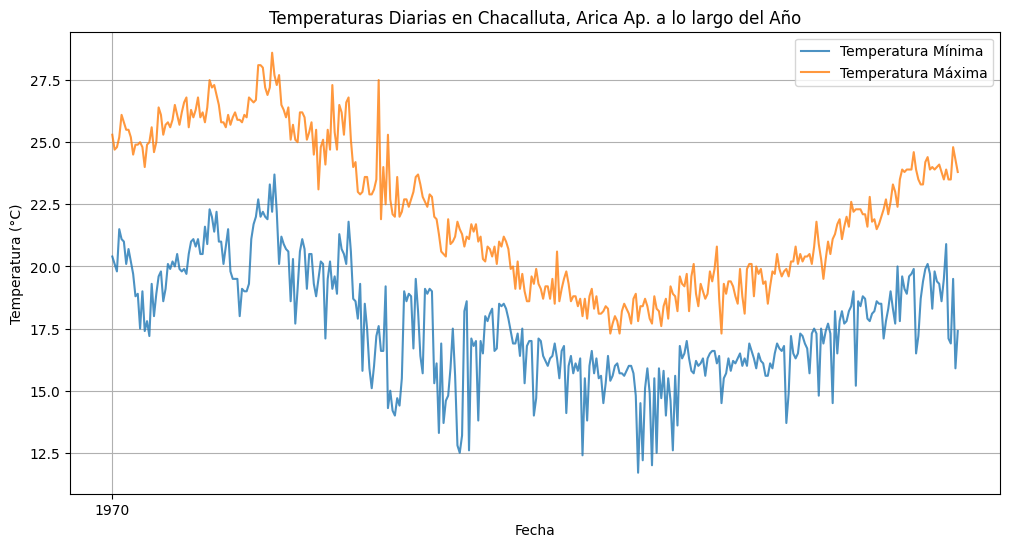

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Serie temporal de temperaturas (TMin y TMax)
# Estación: Chacalluta, Arica Ap

estacion_seleccionada = 'Chacalluta, Arica Ap.'
df_estacion = df[df['Nombre Estacion'] == estacion_seleccionada].copy()

# Asegurar que el índice es de tipo datetime
df_estacion.index = pd.to_datetime(df_estacion.index)

plt.figure(figsize=(12, 6))
plt.plot(df_estacion.index, df_estacion['TMinima'], label='Temperatura Mínima', alpha=0.8)
plt.plot(df_estacion.index, df_estacion['TMaxima'], label='Temperatura Máxima', alpha=0.8)
plt.title(f'Temperaturas Diarias en {estacion_seleccionada} a lo largo del Año')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

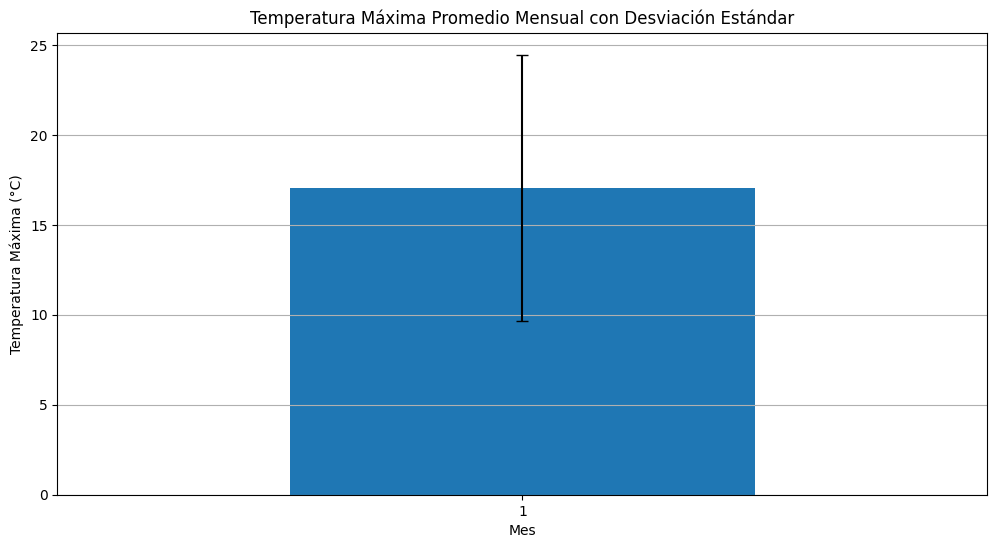

In [17]:
# 2. Resumir TMaxima por mes con dispersión (barras de medias con barras de error)

# Agrupar por mes y calcular la media y desviación estándar de TMaxima
tmax_monthly_summary = df.groupby(df.index.month)['TMaxima'].agg(['mean', 'std'])

# Graficar barras de medias con barras de error
plt.figure(figsize=(12, 6))
tmax_monthly_summary['mean'].plot(kind='bar', yerr=tmax_monthly_summary['std'], capsize=4)
plt.title('Temperatura Máxima Promedio Mensual con Desviación Estándar')
plt.xlabel('Mes')
plt.ylabel('Temperatura Máxima (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

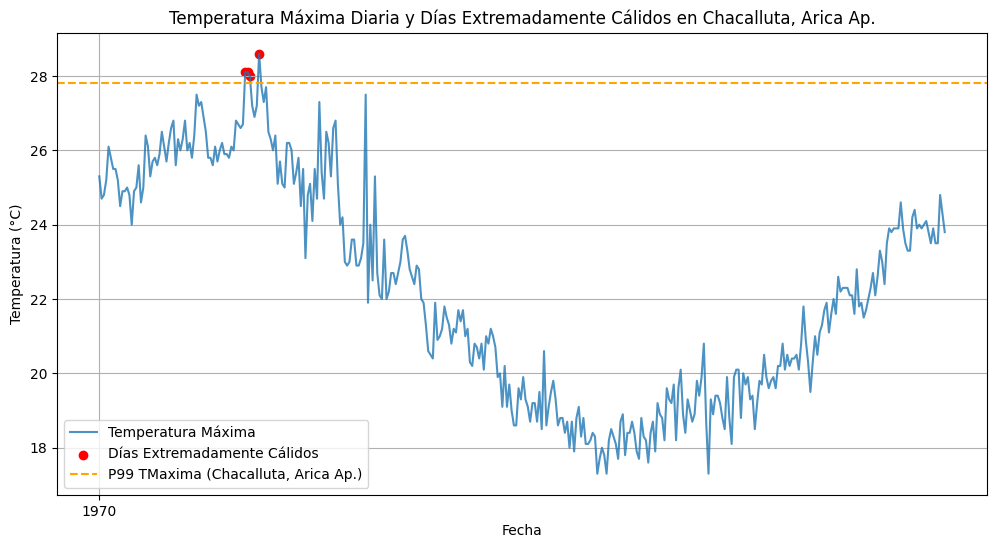

In [18]:
# 3. Resaltar días extremadamente cálidos

# Calcular el umbral del Percentil 99 de TMaxima para cada estación
p99_tmax_estacion = df.groupby('Nombre Estacion')['TMaxima'].quantile(0.99)

# Mapear el P99 de vuelta al DataFrame original
df['P99_TMaxima'] = df['Nombre Estacion'].map(p99_tmax_estacion)

# Identificar los días extremadamente cálidos (TMaxima >= P99)
df['Is_Extremely_Hot'] = (df['TMaxima'] >= df['P99_TMaxima']).astype(int)

# Graficar serie de TMaxima y marcar los días extremadamente cálidos para una estación de ejemplo
estacion_ejemplo = 'Chacalluta, Arica Ap.' # Usamos la misma estación que en el primer gráfico
df_ejemplo = df[df['Nombre Estacion'] == estacion_ejemplo].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_ejemplo.index, df_ejemplo['TMaxima'], label='Temperatura Máxima', alpha=0.8)

# Marcar los días extremadamente cálidos
extremely_hot_days = df_ejemplo[df_ejemplo['Is_Extremely_Hot'] == 1]
plt.scatter(extremely_hot_days.index, extremely_hot_days['TMaxima'], color='red', label='Días Extremadamente Cálidos')

# Agregar línea horizontal en el P99 de esa estación
p99_estacion_ejemplo = p99_tmax_estacion[estacion_ejemplo]
plt.axhline(y=p99_estacion_ejemplo, color='orange', linestyle='--', label=f'P99 TMaxima ({estacion_ejemplo})')

plt.title(f'Temperatura Máxima Diaria y Días Extremadamente Cálidos en {estacion_ejemplo}')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

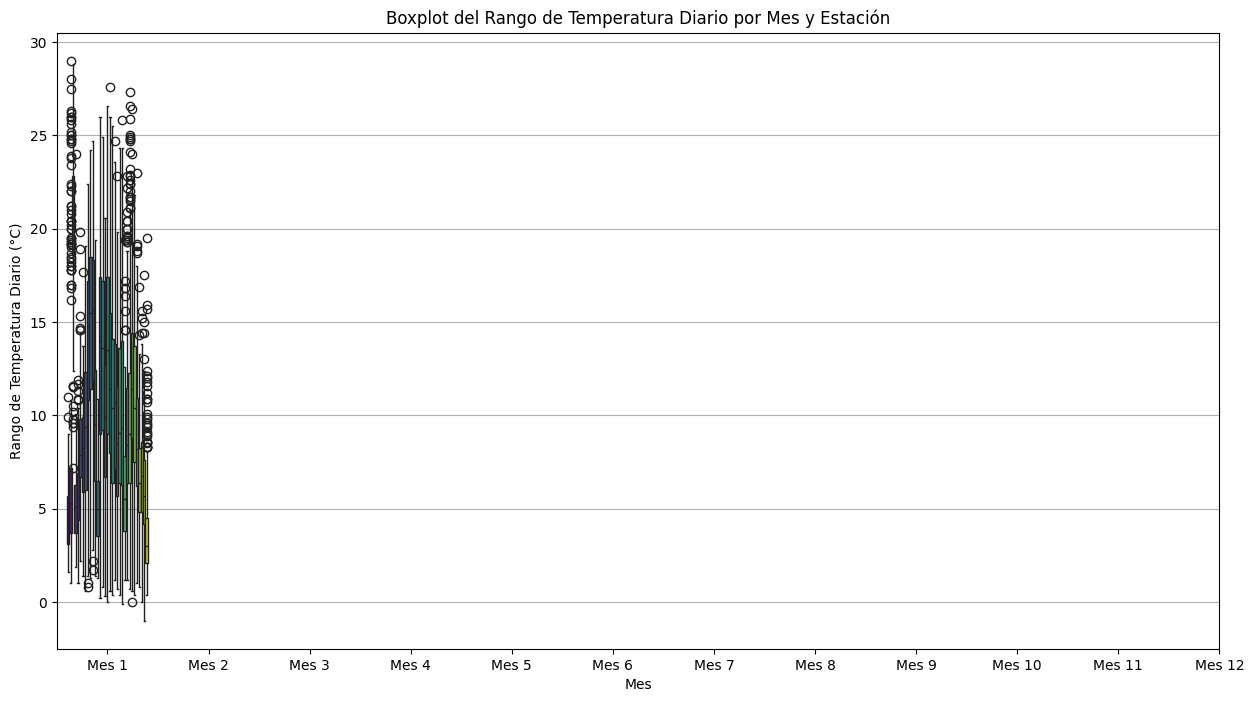

In [19]:

# 4. Crear un boxplot del Rango por mes para cada estación de medición
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x=df.index.month, y='RangoDiario', hue='Nombre Estacion', data=df, palette='viridis', legend=False)
plt.title('Boxplot del Rango de Temperatura Diario por Mes y Estación')
plt.xlabel('Mes')
plt.ylabel('Rango de Temperatura Diario (°C)')
plt.xticks(ticks=range(12), labels=[f'Mes {m+1}' for m in range(12)])
plt.grid(axis='y')
plt.show()